### Task 2.1 Unsupervised preprocessing and visualization

- Load dataset (food.csv)
  - Use `pandas.read_csv()`
- Analyze dataset
  - Check dimensions with `.shape`
  - Count missing values with `.isnull().sum()`
  - Get feature statistics with `.describe()`
- Preprocess data using z-transformation
  - Use `StandardScaler` from `sklearn.preprocessing`
- Perform PCA
  - Use PCA from `sklearn.decomposition`
  - Set n_components=2 to extract PC1 and PC2
- Create score plot
  - Use `matplotlib.pyplot.scatter()`
  - Label axes as "PC1" and "PC2"
- Update Git repository
  - Run `git add`, `git commit -m "your message"`, `git push` in the terminal

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv("./assets/food.csv")

In [96]:
data.shape

(25, 10)

In [97]:
data.isnull().sum()

Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64

In [98]:
data.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


We use the StandardScaler to z-transform the dataset. That means that every feature will have a mean of 0 and a standard deviation of 1.
This has to be done so that all features can be treated equally as many machine-learning algorithms react sensitively on different scales.

In [99]:
data.rename(columns={'Unnamed: 0' : 'country'}, inplace=True)

country_names = data['country']
data = data.drop(columns='country')

scaler = StandardScaler()

standardized_data = scaler.fit_transform(data)

standardized_data = pd.DataFrame(standardized_data, columns=data.columns, index=country_names)

standardized_data.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


We will now use a PCA (Principal Compoentn Analysis) to create uncorrelated variables. Correlation means redundance and the PCA removes that.
variance = Streuung der Daten

some countries eat a lot of meat, some eat barely any meat -> high variance

In [100]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(standardized_data)

pca_data = pd.DataFrame(pca_components, columns=['PC1', 'PC2'], index=country_names)

pca_data.head()


,PC1,PC2
country,,
Albania,3.557238,-1.664102
Austria,-1.452006,-1.062702
Belgium,-1.655480,0.162784
Bulgaria,3.198708,-1.327895
Czechoslovakia,-0.378104,-0.615096


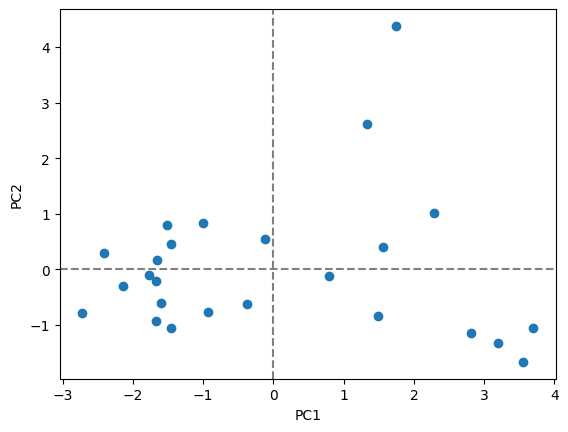

In [110]:
plt.scatter(pca_data['PC1'], pca_data['PC2'])

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.show()